# EE6132: Programming Assignment-2: Image Filtering
**Submitted by Chitranshu Vashishth [ME17B105]**

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.transform import rescale, resize
import helpers

# Task 1 - Filtering

## Implement each of the filtering operations to obtain the desired output. Each of the outputs have to be the same size as the input signal.

The input signal is 
[3.         3.40673664 3.74314483 3.95105652 3.9945219  3.8660254
 3.58778525 3.20791169 2.79208831 2.41221475 2.1339746  2.0054781
 2.04894348 2.25685517 2.59326336 3.        ]


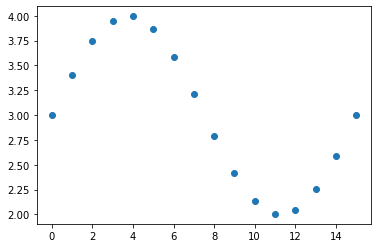

In [2]:
# Creating the input signal

k = np.arange(0,16)
x = 3 + np.sin(2*np.pi*k/15)
plt.scatter(k,x);
print(f"The input signal is \n{x}")

In [3]:
# Implemention (a) filter

xa = np.concatenate((x, np.array([0])), axis=0) # To handle edge condition
ya = xa[k+1] - x[k] #Filtering operation

print(f"The padded array on which the operation is applied is\n {xa}\n")
print(f"The output of implementation (a) is \n {ya}")

The padded array on which the operation is applied is
 [3.         3.40673664 3.74314483 3.95105652 3.9945219  3.8660254
 3.58778525 3.20791169 2.79208831 2.41221475 2.1339746  2.0054781
 2.04894348 2.25685517 2.59326336 3.         0.        ]

The output of implementation (a) is 
 [ 0.40673664  0.33640818  0.20791169  0.04346538 -0.12849649 -0.27824015
 -0.37987356 -0.41582338 -0.37987356 -0.27824015 -0.12849649  0.04346538
  0.20791169  0.33640818  0.40673664 -3.        ]


In [4]:
# Implementing (b) filter

yb = x - np.mean(x) # Filtering operation

print(f"The mean of input signal is {np.mean(x)}\n")
print(f"The output of implementation (b) is \n{yb}")

The mean of input signal is 3.0

The output of implementation (b) is 
[ 0.00000000e+00  4.06736643e-01  7.43144825e-01  9.51056516e-01
  9.94521895e-01  8.66025404e-01  5.87785252e-01  2.07911691e-01
 -2.07911691e-01 -5.87785252e-01 -8.66025404e-01 -9.94521895e-01
 -9.51056516e-01 -7.43144825e-01 -4.06736643e-01 -1.33226763e-15]


In [5]:
# Implementing (c) filter

xc = np.concatenate((np.array([0,0]), x, np.array([0,0])), axis=0) # Padding with zeros for handling edge cases
yc = np.zeros(x.size)
for i in k:
    yc[i] = np.median(xc[i:i+5]) #finding median w.r.t to new xc array which handles edge cases
    
print(f"The output of implementation (c) is \n{yc}")

The output of implementation (c) is 
[3.         3.40673664 3.74314483 3.8660254  3.8660254  3.8660254
 3.58778525 3.20791169 2.79208831 2.41221475 2.1339746  2.1339746
 2.1339746  2.25685517 2.25685517 2.25685517]


In [6]:
# Implementing (d) filter

xd = np.concatenate((np.array([0]), x, np.array([0])), axis=0) # Padding with zeros for handling edge cases
kd = np.arange(xd.size - 1) # For iterating over xd to find linearly interpolated values
xd_1 = (xd[kd] + xd[kd+1])/2 # Created an array holding linearly interpolated values x_(k+0.5)

yd = xd_1[k+1] - xd_1[k]

print(f"The padded array on which the operation is applied is\n {xd}\n")
print(f"The linearly interpolated array is \n {xd_1}]\n")
print(f"The output of implementation (d) is \n{yd}")

The padded array on which the operation is applied is
 [0.         3.         3.40673664 3.74314483 3.95105652 3.9945219
 3.8660254  3.58778525 3.20791169 2.79208831 2.41221475 2.1339746
 2.0054781  2.04894348 2.25685517 2.59326336 3.         0.        ]

The linearly interpolated array is 
 [1.5        3.20336832 3.57494073 3.84710067 3.97278921 3.93027365
 3.72690533 3.39784847 3.         2.60215153 2.27309467 2.06972635
 2.02721079 2.15289933 2.42505927 2.79663168 1.5       ]]

The output of implementation (d) is 
[ 1.70336832  0.37157241  0.27215994  0.12568853 -0.04251556 -0.20336832
 -0.32905686 -0.39784847 -0.39784847 -0.32905686 -0.20336832 -0.04251556
  0.12568853  0.27215994  0.37157241 -1.29663168]


In [7]:
# Implementing (e) filter

ye = np.abs(yd)

print(f"The output of implementation (e) is \n{ye}")

The output of implementation (e) is 
[1.70336832 0.37157241 0.27215994 0.12568853 0.04251556 0.20336832
 0.32905686 0.39784847 0.39784847 0.32905686 0.20336832 0.04251556
 0.12568853 0.27215994 0.37157241 1.29663168]


In [8]:
# Implementing (f) filter

xf = np.concatenate((np.array([0,0]), x, np.array([0,0])), axis=0) # Padding with zeros for handling edge cases
yf = np.zeros(x.size)

for i in k:
    yf[i] = np.sum(xf[i:i+5])/5
print(f"The padded array on which the operation is applied is\n {xf}\n")
print(f"The output of implementation (f) is \n{yf}")

The padded array on which the operation is applied is
 [0.         0.         3.         3.40673664 3.74314483 3.95105652
 3.9945219  3.8660254  3.58778525 3.20791169 2.79208831 2.41221475
 2.1339746  2.0054781  2.04894348 2.25685517 2.59326336 3.
 0.         0.        ]

The output of implementation (f) is 
[2.02997629 2.8201876  3.61909198 3.79229706 3.82850678 3.72146015
 3.48966651 3.17320508 2.82679492 2.51033349 2.27853985 2.17149322
 2.20770294 2.38090802 1.9798124  1.57002371]


## For each operation, determine if these operations are linear and space-invariant.

The operation which are linear and space invariant are:

a) $y_k = x_{k+1} - x_k$
    
   This is a LSI operation

b) $y_k = x_k - \bar X$ where $\bar X = \frac{1}{L+1}\sum\limits_{i = 0}^Lx_i$
    
   This is not a LSI operation

c) $y_k = median({x_l : l \in [k-2,k+2] })$
   
   median function is not linear so it is not a LSI operation

d) $y_k = x_{k+0.5} - x_{k-0.5}$

   The is a LSI operation considering $x_{k+0.5}$ and $x_{k-0.5}$ is linear interpolation which are obtained by linear combination

e) $y_k$ = $|x_{k+0.5} - x_{k-0.5}|$

   The modulus operation present is not a linear operation so the operation mentioned here is not LSI

f) $y_k = \frac{1}{5}\sum\limits_{i = k -2}^{k+2}x_i$

   This is an LSI operation

## Those operations that are linear and space-invariant, propose an equivalent convolution operation to implement the filtering process and also implement it.

Filter (a) is a LSI system, the equivalent operation is using the filter $f_a = [1,-1,0]$  

In [9]:
fa = np.array([1,-1,0]) #filter(a)
yaf = np.convolve(x,fa,'same')
print(f"The output of convolution for (a) is \n {yaf}")

The output of convolution for (a) is 
 [ 0.40673664  0.33640818  0.20791169  0.04346538 -0.12849649 -0.27824015
 -0.37987356 -0.41582338 -0.37987356 -0.27824015 -0.12849649  0.04346538
  0.20791169  0.33640818  0.40673664 -3.        ]


---
filters (b),(c),(e) are not a LSI operations, so no equivalent filters exist for them

Filter (d) is a LSI operation. 

$$x_{k+0.5} = \frac{x_{k+1} + x_{k}}{2},x_{k-0.5} = \frac{x_{k}+x_{k-1}}{2}$$
$$y = x_{k+0.5} - x_{k-0.5} \implies y = \frac{x_{k+1}-x_{k-1}}{2}$$

Therefore the equivalent convolution filter for (d) should be [1/2 ,0 , -1/2]

In [10]:
fd = fd = np.array([1/2,0,-1/2]) # filter (d)
ydf = np.convolve(x,fd,'same')
print(f"The output of convolution for (d) is \n {ydf}")

The output of convolution for (d) is 
 [ 1.70336832  0.37157241  0.27215994  0.12568853 -0.04251556 -0.20336832
 -0.32905686 -0.39784847 -0.39784847 -0.32905686 -0.20336832 -0.04251556
  0.12568853  0.27215994  0.37157241 -1.29663168]


Filter (f) is an LSI operaiton, it equivalent filter is $[\frac{1}{5},\frac{1}{5},\frac{1}{5},\frac{1}{5},\frac{1}{5}]$,this filter can be directly observed from the equation of the filter f

$$y_k = \frac{1}{5}\sum_{i = k-2}^{k+2}x_i$$

In [11]:
ff = np.array([1/5,1/5,1/5,1/5,1/5]) #filter (f)
yff = np.convolve(x,ff,'same')
print(f"The output of convolution for (f) is \n {yff}")

The output of convolution for (f) is 
 [2.02997629 2.8201876  3.61909198 3.79229706 3.82850678 3.72146015
 3.48966651 3.17320508 2.82679492 2.51033349 2.27853985 2.17149322
 2.20770294 2.38090802 1.9798124  1.57002371]


## For filters that are implemented via convolution, verify if the results are the same visually.

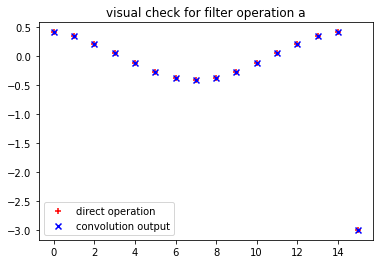

In [12]:
plt.title("visual check for filter operation a")
plt.scatter(k,ya,c='r',marker='+',label = 'direct operation')
plt.scatter(k,yaf,c='b',marker='x',label = 'convolution output')
plt.legend(loc = 'lower left')
plt.show()

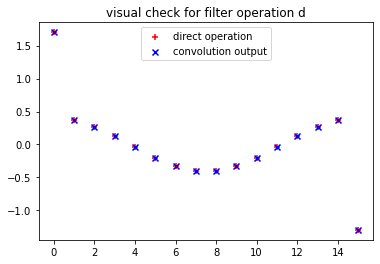

In [13]:
plt.title("visual check for filter operation d")
plt.scatter(k,yd,c='r',marker='+',label = 'direct operation')
plt.scatter(k,ydf,c='b',marker='x',label = 'convolution output')
plt.legend(loc = 'upper center')
plt.show()

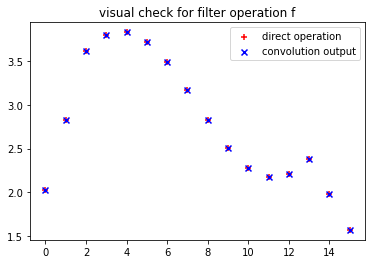

In [14]:
plt.title("visual check for filter operation f")
plt.scatter(k,yf,c='r',marker='+',label = 'direct operation')
plt.scatter(k,yff,c='b',marker='x',label = 'convolution output')
plt.legend(loc = 'upper right')
plt.show()

Therefore, we can see that both convolution operation from scipy and out implementation match exactly

# Task 2 -  Filtering in Fourier space

## For those filters above that are linear and space-invariant, implement them in the Fourier domain

In [15]:
#converting the input to frequency domain

l = x.size
x_freq = np.fft.fft(x,l)
print(f"The input in frequency domain is \n{x_freq}")

The input in frequency domain is 
[48.        +0.j          1.4980046 -7.53097769j -0.28853703+0.69659001j
 -0.23648826+0.35392969j -0.22261434+0.22261434j -0.21693237+0.14494958j
 -0.21421711+0.08873163j -0.21293721+0.04235584j -0.21255656+0.j
 -0.21293721-0.04235584j -0.21421711-0.08873163j -0.21693237-0.14494958j
 -0.22261434-0.22261434j -0.23648826-0.35392969j -0.28853703-0.69659001j
  1.4980046 +7.53097769j]


In [16]:
#converting filter (a) into freq domain
fa_freq = np.fft.fft(fa,l)
#multiply the filter and the input in the freq domain
ya_freq = fa_freq * x_freq
#converiting the output to time domain and considering only real part
ya_fft = np.real(np.fft.ifft(ya_freq)) 
print(ya_fft)

[ 8.88178420e-16  4.06736643e-01  3.36408182e-01  2.07911691e-01
  4.34653791e-02 -1.28496492e-01 -2.78240151e-01 -3.79873561e-01
 -4.15823382e-01 -3.79873561e-01 -2.78240151e-01 -1.28496492e-01
  4.34653791e-02  2.07911691e-01  3.36408182e-01  4.06736643e-01]


In [17]:
#converting filter (d) into freq domain
fd_freq = np.fft.fft(fd,l)
#multiply the filter and the input in the freq domain
yd_freq = fd_freq * x_freq
#converiting the output to time domain and considering only real part
yd_fft = np.real(np.fft.ifft(yd_freq)) 
print(yd_fft)

[ 0.20336832  0.20336832  0.37157241  0.27215994  0.12568853 -0.04251556
 -0.20336832 -0.32905686 -0.39784847 -0.39784847 -0.32905686 -0.20336832
 -0.04251556  0.12568853  0.27215994  0.37157241]


In [18]:
#converting filter (f) into freq domain
ff_freq = np.fft.fft(ff,l)
#multiply the filter and the input in the freq domain
yf_freq = ff_freq * x_freq
#converiting the output to time domain and considering only real part
yf_fft = np.real(np.fft.ifft(yf_freq)) 
print(yf_fft)

[2.5798124  2.85137103 3.14862897 3.4201876  3.61909198 3.79229706
 3.82850678 3.72146015 3.48966651 3.17320508 2.82679492 2.51033349
 2.27853985 2.17149322 2.20770294 2.38090802]


## Verify that the desired output from the Fourier implementation is the same as the spatial domain implementation. If there’s any difference, explain why?

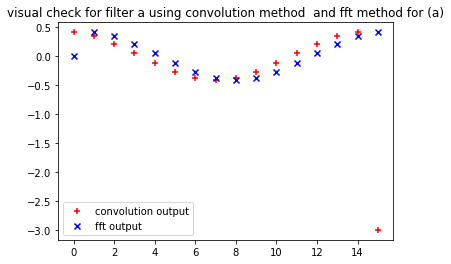

In [19]:
plt.title("visual check for filter a using convolution method  and fft method for (a)")
plt.scatter(k,yaf,c='r',marker='+',label = 'convolution output')
plt.scatter(k,ya_fft,c='b',marker='x',label = 'fft output')
plt.legend(loc = 'lower left')
plt.show()

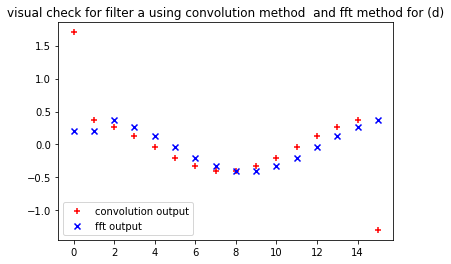

In [20]:
plt.title("visual check for filter a using convolution method  and fft method for (d)")
plt.scatter(k,ydf,c='r',marker='+',label = 'convolution output')
plt.scatter(k,yd_fft,c='b',marker='x',label = 'fft output')
plt.legend(loc = 'lower left')
plt.show()

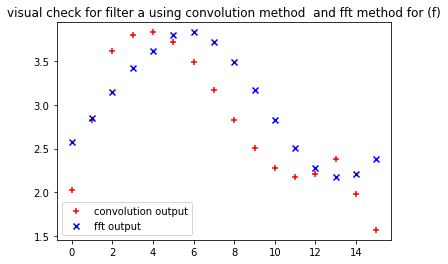

In [21]:
plt.title("visual check for filter a using convolution method  and fft method for (f)")
plt.scatter(k,yff,c='r',marker='+',label = 'convolution output')
plt.scatter(k,yf_fft,c='b',marker='x',label = 'fft output')
plt.legend(loc = 'lower left')
plt.show()

We can see that the output of Fourier Domain implementation is not same as the output of Spatial Domain. The largest discrepancy is visible at the edges where the calculations were made assuming zero padding. All the values of fft implementation are right shifted by 1 value in case of (a) and (d) and by 2 values in the case of (f)

## If for any of the cases, the output from the spatial and Fourier domain implementations are different, then suggest the modification to make the outputs same. Implement the modification and re-verify if the results are the same

One solution for this problem is that we can pad the inputs with ($kernel$ $size$)/$2$ and that would solve the discrepancy of spatial domain and Fourier domain solution

# Task 3 - Hybrid Images

In [22]:
def convolution(image, kernel):

    kernel = cv2.flip(kernel, -1)
    
    channels = 0
    
    if len(image.shape)==3:
        img_H, img_W, channels = image.shape
    
    else:
        img_H, img_W = image.shape[:2]
        
    
    k_H, k_W = kernel.shape
    
    if k_H % 2 != 1:
        raise Exception("Kernel Dimensions have to be Odd")
    
    p_H, p_W = k_H//2, k_W//2
    
    if channels == 3:
        final_image = np.zeros_like(image)
        Image_Padded = np.zeros((image.shape[0]+2*p_H, image.shape[1]+2*p_W, 3))
        Image_Padded[int(p_H):img_H + int(p_H), int(p_W):img_W + int(p_W), :] = image
    
    else:
        final_image = np.zeros_like(image)
        Image_Padded = np.zeros((image.shape[0]+2*p_H, image.shape[1]+2*p_W))
        Image_Padded[int(p_H):img_H + int(p_H), int(p_W):img_W + int(p_W)] = image

    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            if channels == 3:
                for channel in range(channels):
                    patch = Image_Padded[y: y + k_H, x: x + k_W, channel]
                    final_image[y, x, channel] = (patch * kernel).sum()
                    
            else:
                patch = Image_Padded[y: y + k_H, x: x + k_W]
                final_image[y, x] = (patch * kernel).sum()

    
    
    return final_image

In [23]:
def Gaussian_Kernel(sigma):
    
    filter_size = (6 * sigma) + 1
    
        
    gaussian_filter = np.zeros((filter_size, filter_size))
    center = filter_size // 2

    for y in range(filter_size):
        for x in range(filter_size):
            diff = (y - center) ** 2 + (x - center) ** 2
            gaussian_filter[y, x] = np.exp(-diff / (2 * sigma ** 2))

    gaussian_filter = gaussian_filter / np.sum(gaussian_filter)
    
    return gaussian_filter

In [24]:
def create_hybrid_image(image_low, image_high, sigma):
    
    g_filter = Gaussian_Kernel(sigma)
    
    low_pass_image = convolution(image_low, g_filter)
    
    high_pass_image = image_high - convolution(image_high, g_filter)
    
    hybrid_image = low_pass_image + high_pass_image
    hybrid_image = np.clip(hybrid_image, a_min = 0, a_max = 1)
    
    return hybrid_image

### Ex01

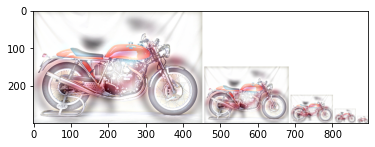

In [25]:
image_1 = helpers.load_image("./data/ex01/bicycle.bmp")
image_2 = helpers.load_image("./data/ex01/motorcycle.bmp")

hybrid_img = create_hybrid_image(np.asarray(image_1, dtype='float'), np.asarray(image_2, dtype='float'), 9)
disp = helpers.vis_hybrid_image(hybrid_img)
plt.imshow(disp);

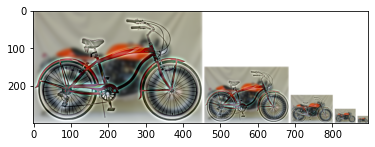

In [26]:
hybrid_img = create_hybrid_image(np.asarray(image_2, dtype='float'), np.asarray(image_1, dtype='float'), 4)
disp = helpers.vis_hybrid_image(hybrid_img)
plt.imshow(disp);

### Ex02

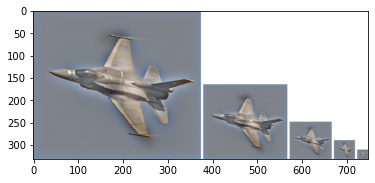

In [27]:
image_1 = helpers.load_image("./data/ex02/bird.bmp")
image_2 = helpers.load_image("./data/ex02/plane.bmp")

hybrid_img = create_hybrid_image(np.asarray(image_1, dtype='float'), np.asarray(image_2, dtype='float'), 11)
disp = helpers.vis_hybrid_image(hybrid_img)
plt.imshow(disp);

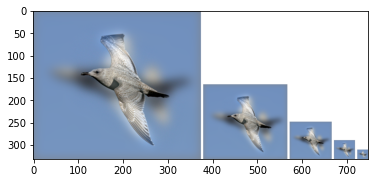

In [28]:
hybrid_img = create_hybrid_image(np.asarray(image_2, dtype='float'), np.asarray(image_1, dtype='float'), 11)
disp = helpers.vis_hybrid_image(hybrid_img)
plt.imshow(disp);

### Ex03

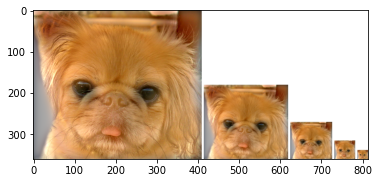

In [29]:
image_1 = helpers.load_image("./data/ex03/cat.bmp")
image_2 = helpers.load_image("./data/ex03/dog.bmp")

hybrid_img = create_hybrid_image(np.asarray(image_1, dtype='float'), np.asarray(image_2, dtype='float'), 11)
disp = helpers.vis_hybrid_image(hybrid_img)
plt.imshow(disp);

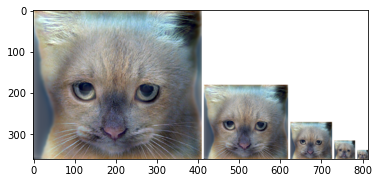

In [30]:
hybrid_img = create_hybrid_image(np.asarray(image_2, dtype='float'), np.asarray(image_1, dtype='float'), 9)
disp = helpers.vis_hybrid_image(hybrid_img)
plt.imshow(disp);

### Ex04

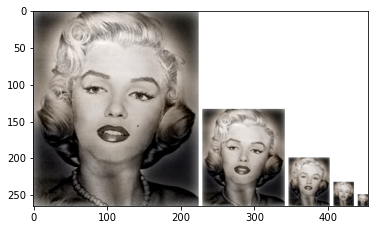

In [31]:
image_1 = helpers.load_image("./data/ex04/einstein.bmp")
image_2 = helpers.load_image("./data/ex04/marilyn.bmp")

hybrid_img = create_hybrid_image(np.asarray(image_1, dtype='float'), np.asarray(image_2, dtype='float'), 9)
disp = helpers.vis_hybrid_image(hybrid_img)
plt.imshow(disp);

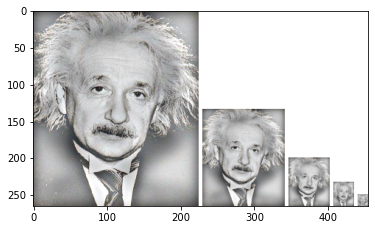

In [32]:
hybrid_img = create_hybrid_image(np.asarray(image_2, dtype='float'), np.asarray(image_1, dtype='float'), 9)
disp = helpers.vis_hybrid_image(hybrid_img)
plt.imshow(disp);

### Ex05

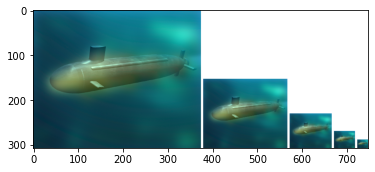

In [33]:
image_1 = helpers.load_image("./data/ex05/fish.bmp")
image_2 = helpers.load_image("./data/ex05/submarine.bmp")

hybrid_img = create_hybrid_image(np.asarray(image_1, dtype='float'), np.asarray(image_2, dtype='float'), 13)
disp = helpers.vis_hybrid_image(hybrid_img)
plt.imshow(disp);

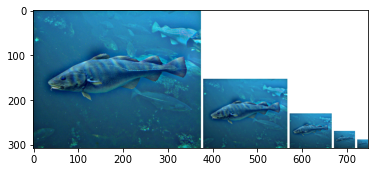

In [34]:
hybrid_img = create_hybrid_image(np.asarray(image_2, dtype='float'), np.asarray(image_1, dtype='float'), 9)
disp = helpers.vis_hybrid_image(hybrid_img)
plt.imshow(disp);

### Ex06

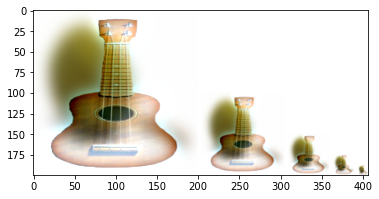

In [35]:
image_1 = helpers.load_image("./data/ex06/durian.jpg")
image_2 = helpers.load_image("./data/ex06/ukulele.jpg")
image_1 = resize(image_1, (200, 200))
image_2 = resize(image_2, (200, 200))

hybrid_img = create_hybrid_image(np.asarray(image_1, dtype='float'), np.asarray(image_2, dtype='float'), 9)
disp = helpers.vis_hybrid_image(hybrid_img)
plt.imshow(disp);

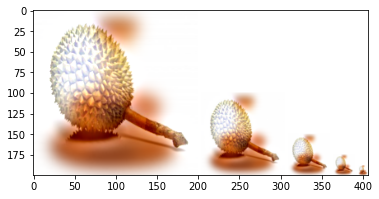

In [36]:
hybrid_img = create_hybrid_image(np.asarray(image_2, dtype='float'), np.asarray(image_1, dtype='float'), 9)
disp = helpers.vis_hybrid_image(hybrid_img)
plt.imshow(disp);

### Ex07

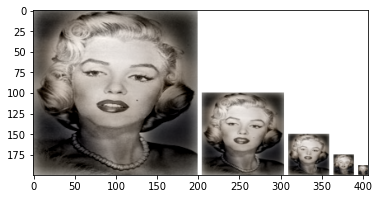

In [37]:
image_1 = helpers.load_image("./data/ex07/einstein.jpg")
image_2 = helpers.load_image("./data/ex07/marilyn.jpg")
image_1 = resize(image_1, (200, 200))
image_2 = resize(image_2, (200, 200))

hybrid_img = create_hybrid_image(np.asarray(image_1, dtype='float'), np.asarray(image_2, dtype='float'), 9)
disp = helpers.vis_hybrid_image(hybrid_img)
plt.imshow(disp);

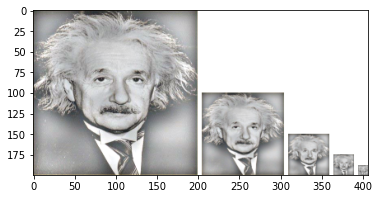

In [38]:
hybrid_img = create_hybrid_image(np.asarray(image_2, dtype='float'), np.asarray(image_1, dtype='float'), 9)
disp = helpers.vis_hybrid_image(hybrid_img)
plt.imshow(disp);